# SML312 Research Projects in Data Science Fall 2022
#### Research Question: What is the relationship between homeless clustering and homelessness services in San Diego?


#### Importing Data

In [2]:
# source https://data.sandiegodata.org/dataset/sandiegodata-org-dowtown-homeless/#packages
import pandas as pd
import folium
from folium.plugins import HeatMap
import shapely
import geopandas as gpd
import numpy as np


In [3]:

neighborhood_totals_df =  pd.read_csv('http://library.metatab.org/sandiegodata.org-dowtown_homeless-2.1.1/data/neighborhood_totals.csv')
monthly_totals_df =  pd.read_csv('http://library.metatab.org/sandiegodata.org-dowtown_homeless-2.1.1/data/monthly_totals.csv')
homeless_counts_df = gpd.GeoDataFrame(pd.read_csv('http://library.metatab.org/sandiegodata.org-dowtown_homeless-2.1.1/data/homeless_counts.csv'))
imputed_counts_df =  gpd.GeoDataFrame(pd.read_csv('http://library.metatab.org/sandiegodata.org-dowtown_homeless-2.1.1/data/imputed_counts.csv'))
downtown_blocks_df =  gpd.GeoDataFrame(pd.read_csv('http://library.metatab.org/sandiegodata.org-dowtown_homeless-2.1.1/data/downtown_blocks.csv'))


Defining our Dataframes:
- neighborhood_totals. Totals for each of the neighborhoods for 2018 and 2019, from the published Downtown San Diego Partnership statistics
- monthly_totals. Monthly totals since 2012, from the published Downtown San Diego Partnership statistics
- homeless_counts. Counts of homeless sleepers in Downtown San Diego, 2014 to mid 2018.
- imputed_counts. The homeless_counts file with missing months probablistically imputed
- downtown_blocks. Census TIGER geographic regions for the blocks that have one or more homeless sleepers in this dataset.


#### Cleaning

Converting the geo data frames to have intelligent point geometry objects.

In [4]:
homeless_counts_df['geometry'] = homeless_counts_df.geometry.apply(shapely.wkt.loads)
imputed_counts_df['geometry'] = imputed_counts_df.geometry.apply(shapely.wkt.loads)
downtown_blocks_df['geometry'] = downtown_blocks_df.geometry.apply(shapely.wkt.loads)




#### Describing and Visualizing Our Data
We have a lot of data to work with, let's see what any of it means.

In [5]:
neighborhood_totals_df.head()

,date,east_village,city_center,columbia,marina,cortez,gaslamp
0,2018-01-01,495,123,50,31,61,44
1,2018-02-01,474,156,58,34,56,84
2,2018-03-01,594,128,61,32,72,93
3,2018-04-01,502,111,46,37,44,51
4,2018-05-01,523,180,46,35,52,68


In [6]:
monthly_totals_df.head()

,date,count
0,2012-01-01,486
1,2012-02-01,485
2,2012-03-01,405
3,2012-04-01,453
4,2012-05-01,513


In [7]:
homeless_counts_df.head()

,neighborhood,date,type,temp,rain,geoid,x,y,geometry
0,east_village,2014-01-01,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)
1,east_village,2014-01-01,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)
2,east_village,2014-01-01,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)
3,east_village,2014-01-01,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)
4,east_village,2014-01-01,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)


In [8]:
imputed_counts_df.head()

,neighborhood,date,type,temp,rain,geoid,x,y,geometry
0,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)
1,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)
2,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)
3,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)
4,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)


In [9]:
downtown_blocks_df.head()

,statefp10,countyfp10,tractce10,blockce10,geoid10,name10,mtfcc10,ur10,uace10,funcstat10,aland10,awater10,intptlat10,intptlon10,geometry
0,6,73,5400,4017,10100US060730054004017,Block 4017,G5040,NaN,NaN,S,6516,0,32.710780,-117.156928,"POLYGON ((-117.15739 32.71044, -117.15739 32.7..."
1,6,73,5600,1016,10100US060730056001016,Block 1016,G5040,NaN,NaN,S,5342,0,32.722268,-117.161597,"POLYGON ((-117.16205 32.72258, -117.16187 32.7..."
2,6,73,5600,2060,10100US060730056002060,Block 2060,G5040,NaN,NaN,S,10048,0,32.720414,-117.158836,"POLYGON ((-117.15837 32.71989, -117.15856 32.7..."
3,6,73,5600,1017,10100US060730056001017,Block 1017,G5040,NaN,NaN,S,6551,0,32.722322,-117.162519,"POLYGON ((-117.16296 32.72276, -117.16278 32.7..."
4,6,73,5400,4023,10100US060730054004023,Block 4023,G5040,NaN,NaN,S,9992,0,32.708872,-117.156907,"POLYGON ((-117.15645 32.70835, -117.15736 32.7..."


Convert geospatial dataframes to `GeoDataFrame`s.

In [10]:
homeless_df = gpd.GeoDataFrame(homeless_counts_df)
homeless_df.info()
# there are a lot of mising temperature and rain data


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 39202 entries, 0 to 39201
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   neighborhood  39202 non-null  object  
 1   date          39202 non-null  object  
 2   type          39202 non-null  object  
 3   temp          14190 non-null  float64 
 4   rain          17119 non-null  object  
 5   geoid         39202 non-null  object  
 6   x             39202 non-null  float64 
 7   y             39202 non-null  float64 
 8   geometry      39202 non-null  geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 2.7+ MB


In [11]:
imputed_counts_df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   neighborhood  41166 non-null  object  
 1   date          41166 non-null  object  
 2   type          41166 non-null  object  
 3   temp          14190 non-null  float64 
 4   rain          17119 non-null  object  
 5   geoid         41166 non-null  object  
 6   x             41166 non-null  float64 
 7   y             41166 non-null  float64 
 8   geometry      41166 non-null  geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 2.8+ MB


Let's geneate a basic location based heat map for our recordings of homelessness in San Diego

In [12]:
# this function is adapted from the source: https://www.derekoconn.com/projects/san-diego-homelessness
# 
def getLatLonforHeatMap(homeless_df):
    homeless_lat_lon = pd.DataFrame({'lon': [point.x for point in homeless_df.geometry], 'lat': [
                                    point.y for point in homeless_df.geometry], 'geometry': homeless_df.geometry})
    homeless_array = homeless_lat_lon[['lat', 'lon']].values
    return homeless_lat_lon, homeless_array


In [13]:
# Create map object with reference points
def make_folium_basemap(default_loc=[32.7173, -117.1694], default_tiles='stamentoner', default_zoom=13):
    ref_points_basemap = folium.Map(location=default_loc, tiles=default_tiles, zoom_start=default_zoom, control_scale=True)

    return ref_points_basemap


In [14]:
homeless_map = make_folium_basemap()

homeless_lat_lon_df, homeless_array = getLatLonforHeatMap(homeless_df)

homeless_map.add_child(HeatMap(homeless_array, radius=5))



Let's find homeless services data and see plot it on this heatmap to see if there is any obvious clustering.

In [15]:
imputed_counts_df.head()

,neighborhood,date,type,temp,rain,geoid,x,y,geometry
0,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730054004032,6.282334e+06,1.837657e+06,POINT (-117.15805 32.70541)
1,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)
2,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)
3,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)
4,east_village,2014-01-01 00:00:00,individual,NaN,NaN,10100US060730051001005,6.284917e+06,1.839331e+06,POINT (-117.14970 32.71007)


In [16]:
imputed_counts_df.neighborhood.value_counts()

east_village    26757
core             7337
cortez           2387
gaslamp          1760
marina           1635
columbia         1290
Name: neighborhood, dtype: int64

Here we will import a dataset of all homelessness shelters in the US according to a HIC coc survey. The dataset includes a lot of features such as number of beds and shelter usage statistics. Let's do some EDA to see how usable this dataset is.

In [17]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/hudexchange.info-hic-project-1.zip')

# Create Dataframes

hic_df = pkg.resource('hic').dataframe()

We want to localize this dataset to San Diego. Inspecting the value counts for coc state, there are 8298 recorded rows for California which is good.

In [18]:
hic_df.cocstate.value_counts()

CA    8298
NY    6303
WA    3748
PA    3679
FL    3379
MA    3202
MI    2622
OH    2506
IL    2487
MN    2227
TX    2116
NJ    2093
GA    1943
NC    1744
OR    1714
WI    1556
VA    1526
CT    1385
MD    1346
MO    1341
TN    1216
IN    1143
AZ    1032
LA     943
CO     815
KY     810
AL     794
ME     679
SC     650
IA     643
OK     626
DC     608
WV     511
NH     506
PR     480
UT     472
RI     470
NM     466
VT     453
NE     452
NV     443
KS     440
HI     412
ID     375
AR     360
MS     319
AK     319
DE     306
MT     298
ND     216
SD     215
WY     150
VI      52
GU      50
MP       2
Name: cocstate, dtype: int64

In [19]:
san_diego_coc = "San Diego City and County CoC"

sd_hic_df = hic_df.loc[hic_df['coc'] == san_diego_coc]
sd_hic_df.shape

(1485, 109)

Now we have `sd_hic_df` as the dataframe of all recorded shelters in the San Diego county between 2012 and 2018. From now on we'll continue EDA on this more relevant dataframe.

In [20]:
sd_hic_df.year.value_counts()

2017    220
2018    219
2015    219
2016    216
2014    211
2013    203
2012    197
Name: year, dtype: Int64

In [21]:
sd_hic_df.organization_name.value_counts()

San Diego Housing Commission                               276
Interfaith Community Services                              106
County of San Diego                                         73
St. Vincent de Paul Village                                 72
Catholic Charities                                          67
South Bay Community Services                                66
Veterans Village of San Diego                               62
Interfaith Shelter Network of San Diego                     60
YWCA                                                        44
North County Solutions for Change                           43
Community Housing Works                                     41
Volunteers of America                                       38
East County Transitional Living Center                      34
San Diego Rescue Mission                                    33
Alpha Project                                               30
Salvation Army                                         

Missing Values:

<AxesSubplot: >

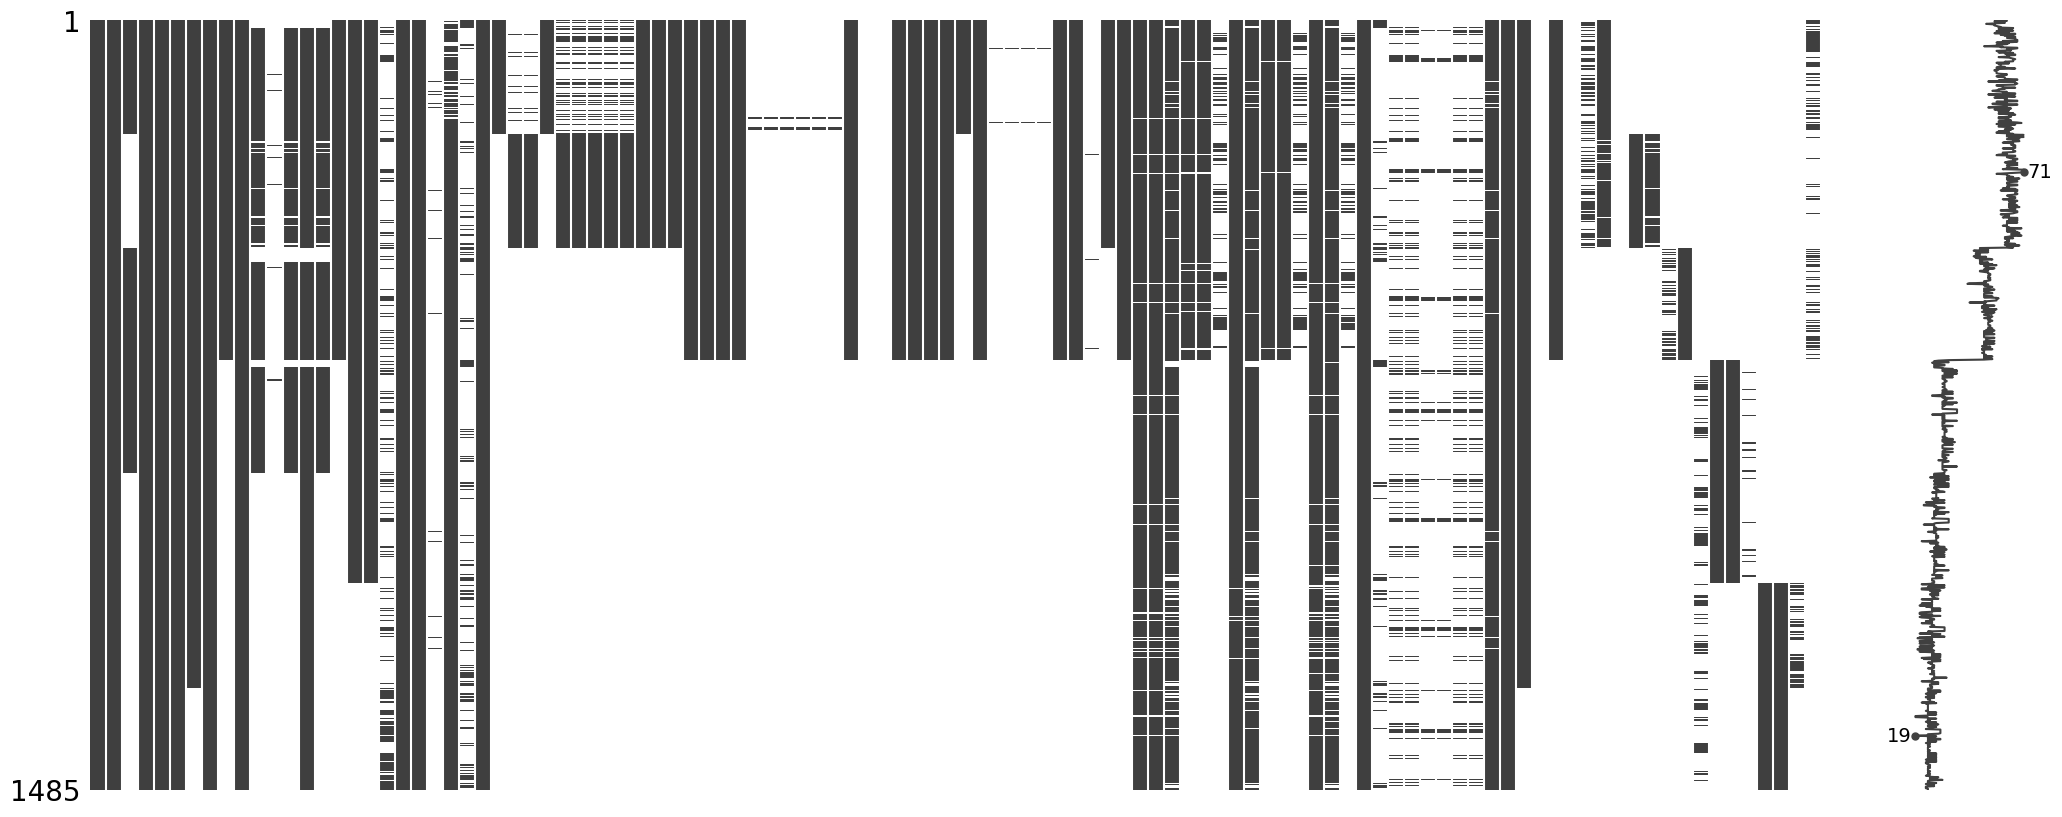

In [22]:
import missingno as msno

msno.matrix(sd_hic_df)

There are a lot of missing values in our dataset, some features go so far as to have no non NaN values at all. To fix this, let's drop all features that have more than 25% of their values missing.

In [67]:
sort_vals = (sd_hic_df.isnull().sum() / sd_hic_df.shape[0]).sort_values(ascending=False)

missing_cols = []
for val in zip(sort_vals.index, sort_vals.values):
    if val[1] > 0.25:
        missing_cols.append(val[0])
    
print(missing_cols)

# dropping these columns with lots of missing values
sd_hic_df.drop(missing_cols, axis=1, inplace=True)

['col108', 'federalfundinghchvcrs', 'federalfundinghchvsh', 'sandyrelatednote', 'questiondesirestousedescriptorelements', 'mergeddefunctyear', 'federalfundinghopwahmv', 'federalfundinghopwaph', 'federalfundinghopwastsf', 'federalfundinghopwath', 'federalfundingotherspecify', 'federalfundinggpdbh', 'federalfundinggpdhh', 'federalfundinggpdct', 'federalfundinggpdsith', 'federalfundinggpdtp', 'federalfundinggpdld', 'address2', 'begin_op_within_year', 'youthagegroup', 'availability_start_date', 'availability_end_date', 'th_unit_type', 'usesrrhmodel', 'dv_beds', 'ch_beds_hh_w_only_children', 'ch_beds_hh_w_children', 'ch_beds_hh_w_o_children', 'projectnotes', 'notes', 'projectstate', 'scattered_sites', 'ch_beds', 'federalfundingrhydp', 'mckinneyventococ', 'mckinneyventoesg', 'mckinneyventococsso', 'mckinneyventoesges', 'mckinneyventoesgrrh', 'target_population_b', 'total_seasonal_beds', 'seasonal_beds_available_in_hmis', 'o_v_beds', 'hmis_o_v_beds', 'mckinneyventococrrh', 'mckinneyventococth

/tmp/ipykernel_4029231/35401955.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_hic_df.drop(missing_cols, axis=1, inplace=True)


<AxesSubplot: >

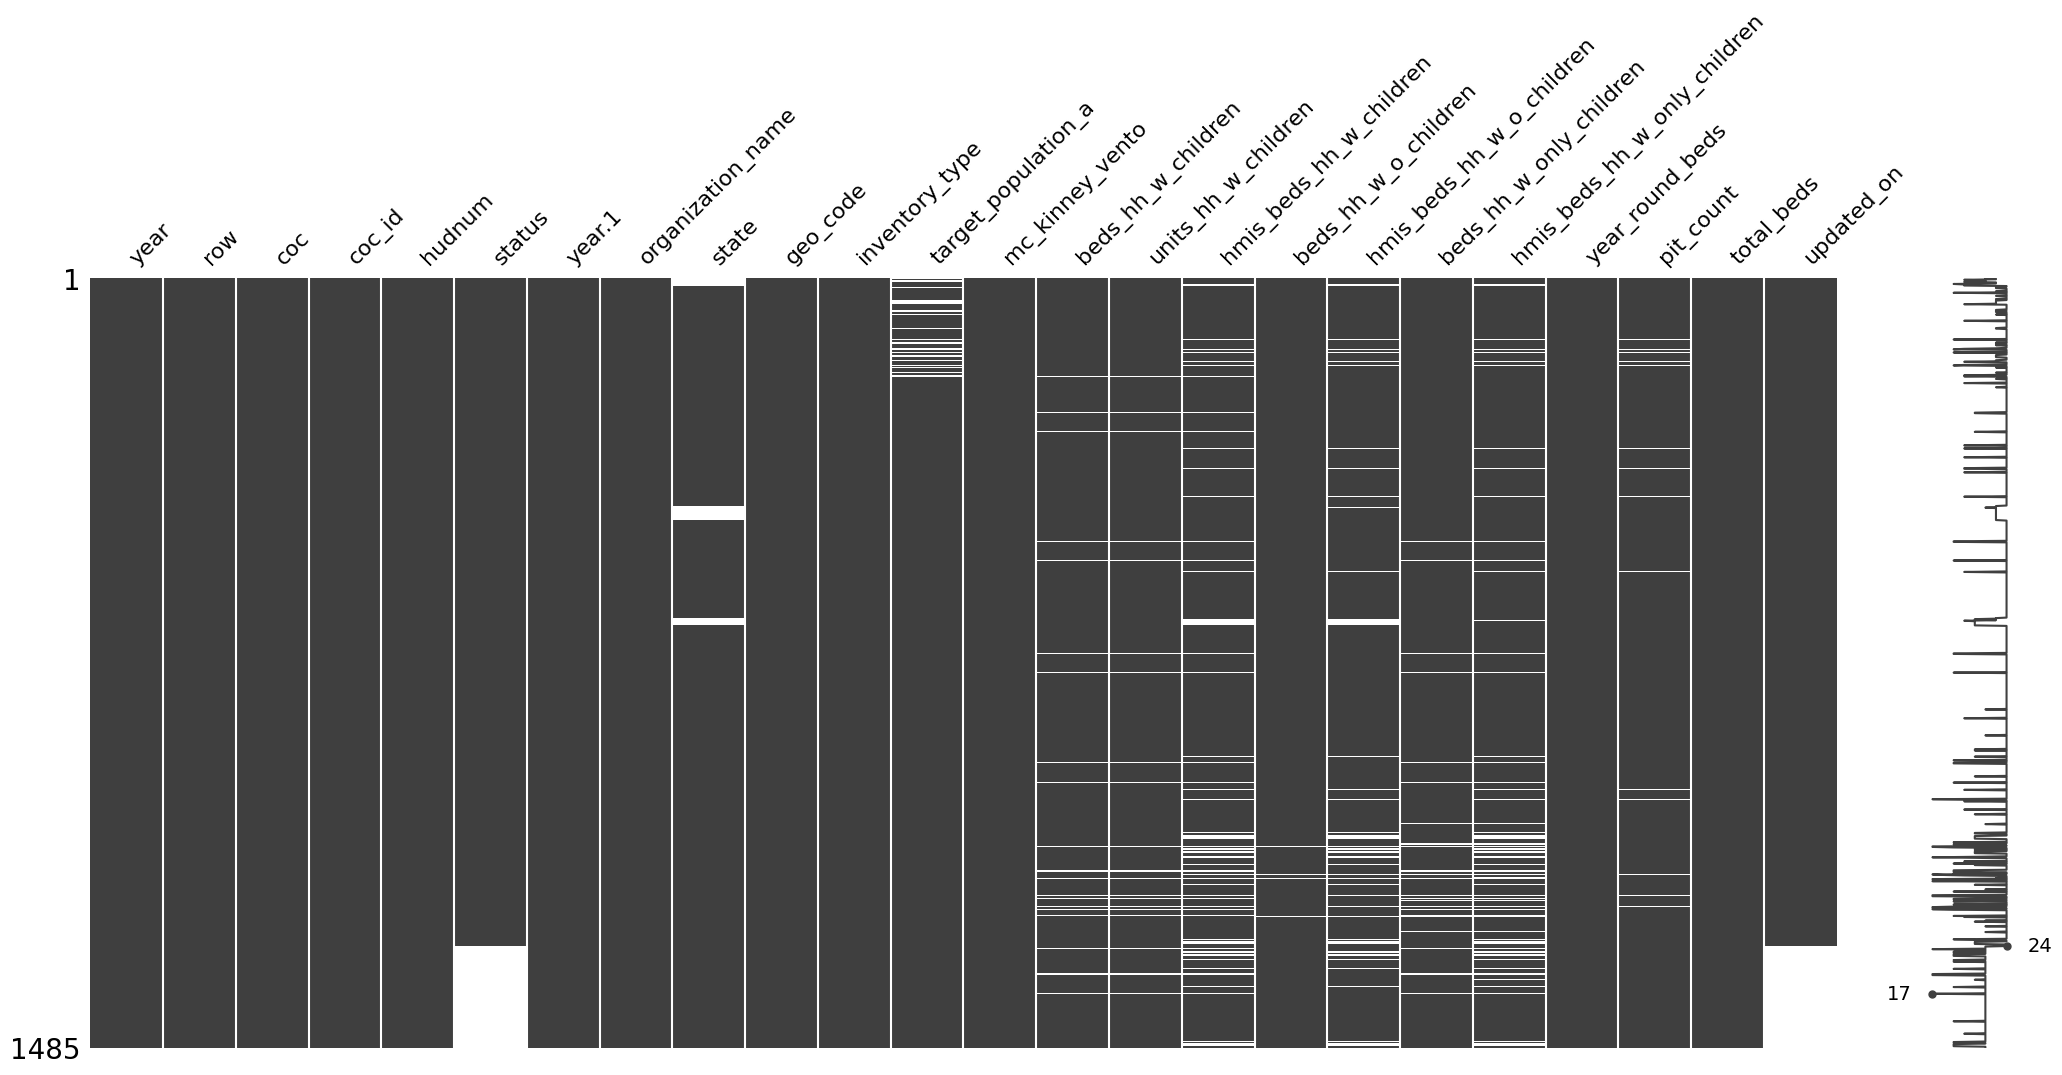

In [70]:
msno.matrix(sd_hic_df)

In [36]:
import matplotlib.pyplot as plt

In [42]:
sd_hic_df.year.values

<IntegerArray>
[2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
 ...
 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012]
Length: 1485, dtype: Int64

In [71]:
sd_hic_df.head()

,year,row,coc,coc_id,hudnum,status,year.1,organization_name,state,geo_code,...,units_hh_w_children,hmis_beds_hh_w_children,beds_hh_w_o_children,hmis_beds_hh_w_o_children,beds_hh_w_only_children,hmis_beds_hh_w_only_children,year_round_beds,pit_count,total_beds,updated_on
3054,2018,344751,San Diego City and County CoC,1419,CA-601,Submitted,2018,City of Oceanside,NaN,62532,...,22.0,0.0,0.0,0.0,0.0,0.0,55,53,55,43214.572292
3055,2018,336750,San Diego City and County CoC,1419,CA-601,Submitted,2018,Community Resource Center,NaN,61212,...,7.0,0.0,0.0,0.0,0.0,0.0,16,16,16,43214.604352
3056,2018,336684,San Diego City and County CoC,1419,CA-601,Submitted,2018,Community Resource Center,NaN,61212,...,4.0,0.0,0.0,0.0,0.0,0.0,15,15,15,43214.605174
3057,2018,336685,San Diego City and County CoC,1419,CA-601,Submitted,2018,Crisis House,NaN,61116,...,10.0,NaN,0.0,NaN,0.0,NaN,36,33,36,43215.441134
3058,2018,347041,San Diego City and County CoC,1419,CA-601,Submitted,2018,Crisis House,NaN,61116,...,34.0,0.0,0.0,0.0,0.0,0.0,119,119,119,43215.452199
